# About the Dataset

This dataset provides insights into how different study habits, learning styles, and external factors influence student performance. It includes 10,000 records, covering details about students' study hours, online learning participation, exam scores, and other factors impacting academic success.

## Use cases:
- Predicting student performance
- Educational insights
- Machine learning applications

## 1. Import libraries for use in analysis and visualization


In [1]:
import pandas as pd # Required for data manipulation and analysis
import numpy as np # Required for mathematical operations
import matplotlib.pyplot as plt # Required for data visualization
import seaborn as sns # Required for statistical data visualization and exploration
import plotly.express as px # Required for interactive data visualization using plotly.express library
import plotly.graph_objects as go # Required for interactive data visualization using plotly.graph_objects library 
from sklearn.preprocessing import LabelEncoder # Required for label encoding categorical variables
from sklearn.feature_selection import mutual_info_regression # Required for mutual information analysis
from sklearn.model_selection import train_test_split# Required for splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression # Required for linear regression analysis
from sklearn.tree import DecisionTreeRegressor # Required for decision tree regression
from sklearn.ensemble import RandomForestRegressor # Required for random forest regression
from sklearn.metrics import mean_squared_error, r2_score # Required for evaluating regression models
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import ttest_ind
from scipy import stats


## Step 2: Load the data

In [2]:
data = pd.read_csv("/Users/junjie/MachineLearningProject/student_performance_large_dataset.csv")
data.head() # Display the first 5 rows of the dataset


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [3]:
data.tail()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D
9999,S10000,24,Male,8,Visual,20,Yes,87,40,81,No,High,17,4,D


In [4]:
data.shape

(10000, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [6]:
data.describe() # Display statistical summary of the dataset including count, mean, SD, minimum and maximum values

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [7]:
data.isnull().sum() # Display the number of missing values in each column of the dataset 

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

### Assesssment: No missing values in this dataset!

In [8]:
print(data.duplicated().sum()) # Display the number of duplicated rows in the dataset

0


### Assessment: No duplicate values in this dataset!

## JJ Thought: At this point we've got to think, are there any unnecessary columns from the dataset?

Dropping and classifying:

1. Student ID (DROPPING because Student_ID is a unique identifier, not useful for modelling)
2. Age (numeric)
3. Gender (nominal)
4. Study hours per week (numeric)
5. Preferred learning style (nominal)
6. Online courses completed (numeric)
7. Participation in discussions (nominal)
8. Assignment completion rate (numeric)
9. Exam score (numeric)
10. Attendance rate (numeric)
11. Use of educational tech (nominal)
12. Self reported stress level (ordinal)
13. Time spent on social media (numeric)
14. Sleep per night (numeric)
15. Final grade (ordinal)

Numeric - age, gender, studyhoursperweek,onlinecoursescompleted,assignmentcompletionrate,examscore, attendancerate, timespentonsocialmedia, sleeppernight
Ordinal - selfreportedstresslevel, grade
Nominal - gender, preferred learning style, participation in discussions,  use of edtech,

In [9]:
data_clean = data.drop(columns=["Student_ID"], axis=1)


In [10]:
data_clean

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [11]:
data_clean['Gender'] = data['Gender'].astype('category')
data_clean['Preferred_Learning_Style'] = data['Preferred_Learning_Style'].astype('category')
data_clean['Participation_in_Discussions'] = data['Participation_in_Discussions'].astype('category')
data_clean['Use_of_Educational_Tech'] = data['Use_of_Educational_Tech'].astype('category')





In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Age                                      10000 non-null  int64   
 1   Gender                                   10000 non-null  category
 2   Study_Hours_per_Week                     10000 non-null  int64   
 3   Preferred_Learning_Style                 10000 non-null  category
 4   Online_Courses_Completed                 10000 non-null  int64   
 5   Participation_in_Discussions             10000 non-null  category
 6   Assignment_Completion_Rate (%)           10000 non-null  int64   
 7   Exam_Score (%)                           10000 non-null  int64   
 8   Attendance_Rate (%)                      10000 non-null  int64   
 9   Use_of_Educational_Tech                  10000 non-null  category
 10  Self_Reported_Stress_Level         

In [13]:
data_clean.shape

(10000, 14)

## To check on outlier values

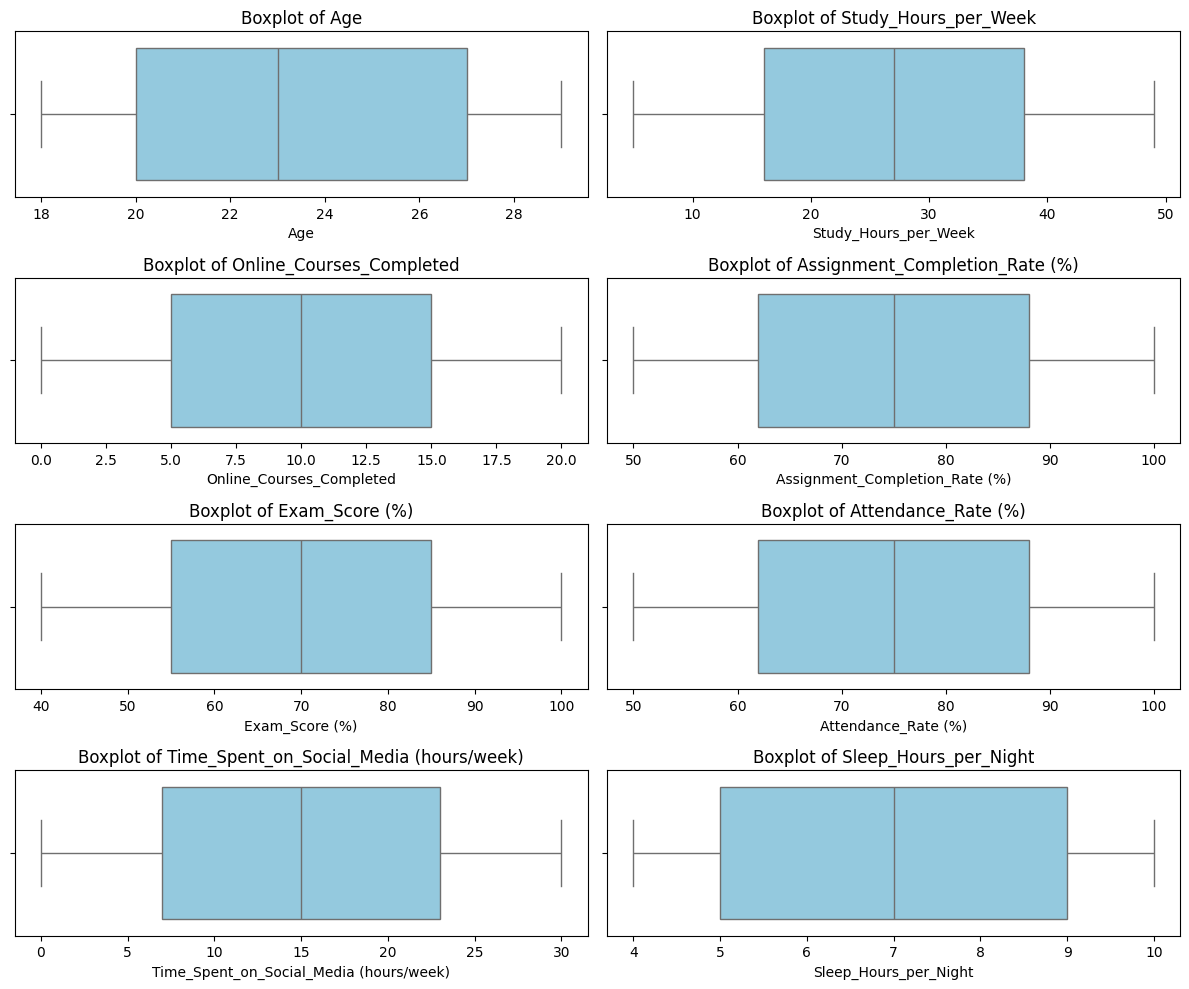

In [14]:
numerical_cols = [
    "Age", 
    "Study_Hours_per_Week", 
    "Online_Courses_Completed", 
    "Assignment_Completion_Rate (%)", 
    "Exam_Score (%)",
    "Attendance_Rate (%)",
    "Time_Spent_on_Social_Media (hours/week)",
    "Sleep_Hours_per_Night"
]

plt.figure(figsize=(12, 10))  # Adjust the figure size
# Use a 4x2 grid for 8 subplots. Boxplot for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

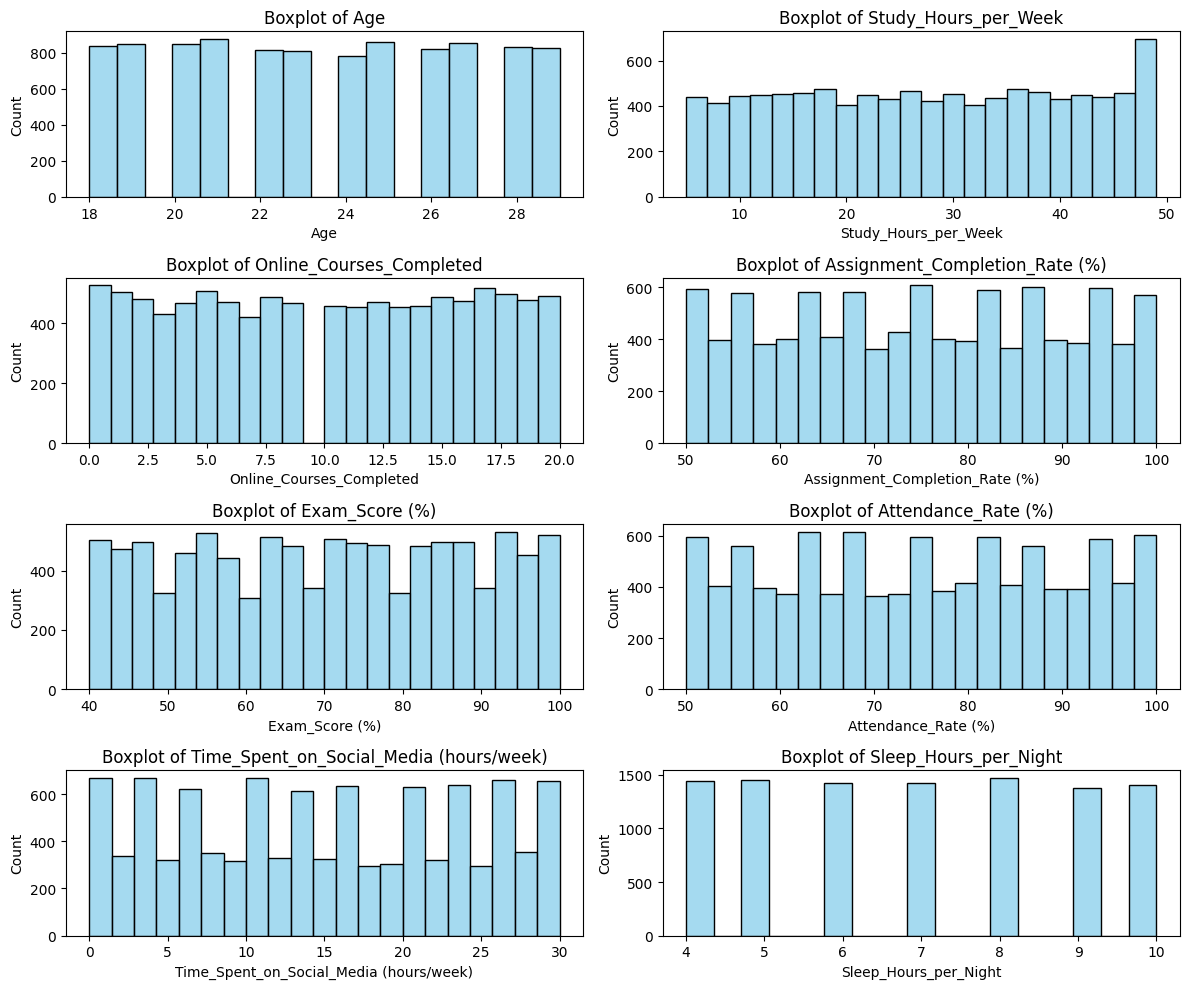

In [15]:
numerical_cols = [
    "Age", 
    "Study_Hours_per_Week", 
    "Online_Courses_Completed", 
    "Assignment_Completion_Rate (%)", 
    "Exam_Score (%)",
    "Attendance_Rate (%)",
    "Time_Spent_on_Social_Media (hours/week)",
    "Sleep_Hours_per_Night"
]

plt.figure(figsize=(12, 10))  # Adjust the figure size
# Use a 4x2 grid for 8 subplots. Boxplot for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(x=data_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Assessment of boxplot and histplot?

In [16]:
numeric_df = data_clean.select_dtypes(include='number')
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

count_out = numeric_df[(numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))].count()
df_count_out = pd.DataFrame(count_out, columns=['count_out'])

print(df_count_out)

                                         count_out
Age                                              0
Study_Hours_per_Week                             0
Online_Courses_Completed                         0
Assignment_Completion_Rate (%)                   0
Exam_Score (%)                                   0
Attendance_Rate (%)                              0
Time_Spent_on_Social_Media (hours/week)          0
Sleep_Hours_per_Night                            0


## Encoding necessary columns for ML model
Machine learning models and numerical analysis require categorical data to be converted into numbers.¶
🛠 Solution: One-Hot Encoding for non-ordinal categories (e.g., Gender, Department). Label Encoding for ordinal categories (e.g., Parent_Education_Level). python Copy Edit

use a label encoder to encode the 'family_income_level' column and "grade" column into numerical values as must be ordered


In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

# Transform the 'Self_Reported_Stress_Level' column
data_clean['Self_Reported_Stress_Level'] = ordinal_encoder.fit_transform(data_clean[['Self_Reported_Stress_Level']])

# Check the result
print(data_clean['Self_Reported_Stress_Level'].head())

0    2.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Self_Reported_Stress_Level, dtype: float64


In [18]:
le = LabelEncoder()
data_clean["Final_Grade"] = le.fit_transform(data_clean["Final_Grade"])

print(data_clean['Final_Grade'].head())

0    2
1    3
2    3
3    1
4    2
Name: Final_Grade, dtype: int64


In [19]:
data_clean = pd.get_dummies(data_clean, columns=["Preferred_Learning_Style", "Participation_in_Discussions", "Use_of_Educational_Tech","Gender"], drop_first=True)

Finally the data is ready for analysis purposes

In [20]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Study_Hours_per_Week                      10000 non-null  int64  
 2   Online_Courses_Completed                  10000 non-null  int64  
 3   Assignment_Completion_Rate (%)            10000 non-null  int64  
 4   Exam_Score (%)                            10000 non-null  int64  
 5   Attendance_Rate (%)                       10000 non-null  int64  
 6   Self_Reported_Stress_Level                10000 non-null  float64
 7   Time_Spent_on_Social_Media (hours/week)   10000 non-null  int64  
 8   Sleep_Hours_per_Night                     10000 non-null  int64  
 9   Final_Grade                               10000 non-null  int64  
 10  Preferred_Learning_Style_Kinestheti

In [21]:
data_clean.head()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Gender_Male,Gender_Other
0,18,48,14,100,69,66,2.0,9,8,2,True,False,False,True,True,False,False
1,29,30,20,71,40,57,1.0,28,8,3,False,True,False,False,True,False,False
2,20,47,11,60,43,79,0.0,13,7,3,True,False,False,False,True,False,False
3,23,13,0,63,70,60,0.0,24,10,1,False,False,False,True,True,False,False
4,19,24,19,59,63,93,1.0,26,8,2,False,False,False,True,True,False,False


# Exploratory Data Analysis

In [22]:
# Summary statistics
data_clean.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,0.905300,14.936500,6.979300,1.461600
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,0.699701,9.022639,1.996965,1.126789
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,0.000000,4.000000,0.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,0.000000,7.000000,5.000000,0.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,1.000000,15.000000,7.000000,1.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,1.000000,23.000000,9.000000,2.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,2.000000,30.000000,10.000000,3.000000


## Correlation Heatmap

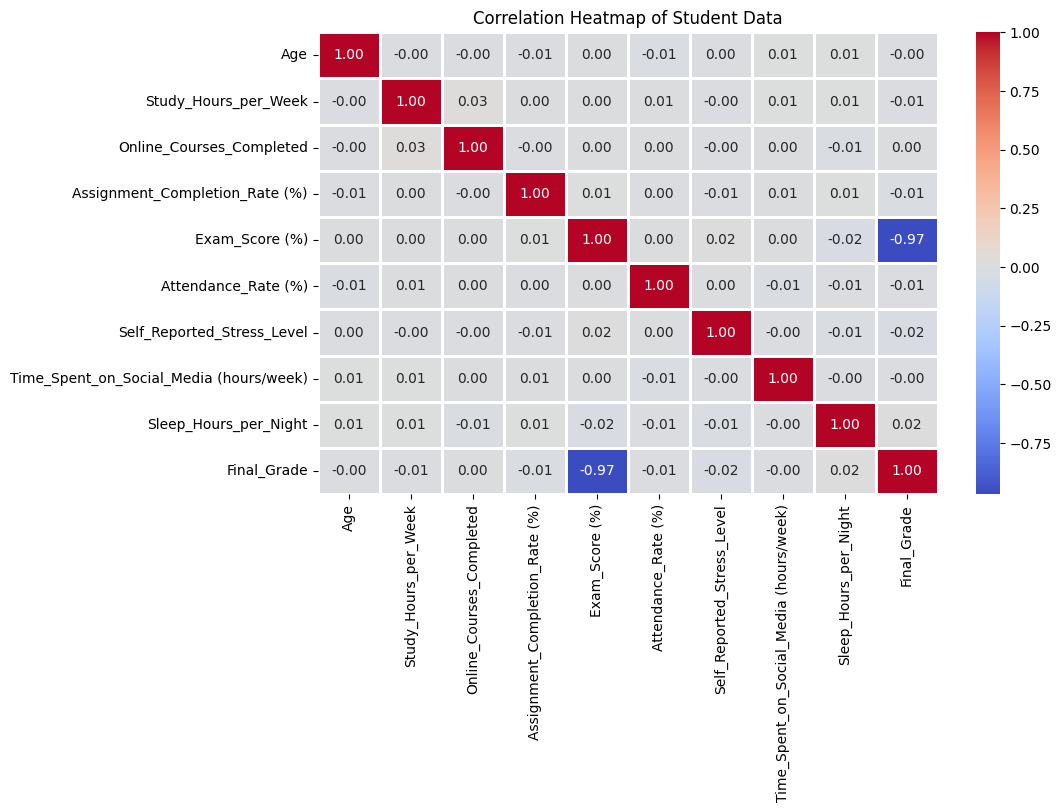

In [23]:
# Select only numeric columns
numeric_df = data_clean.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap of Student Data")
plt.show()

## Weak Correlation in heatmap then we show different correlation methods

In [24]:
spearman_corr=numeric_df.corr(method='spearman')
# Use Spearman correlation

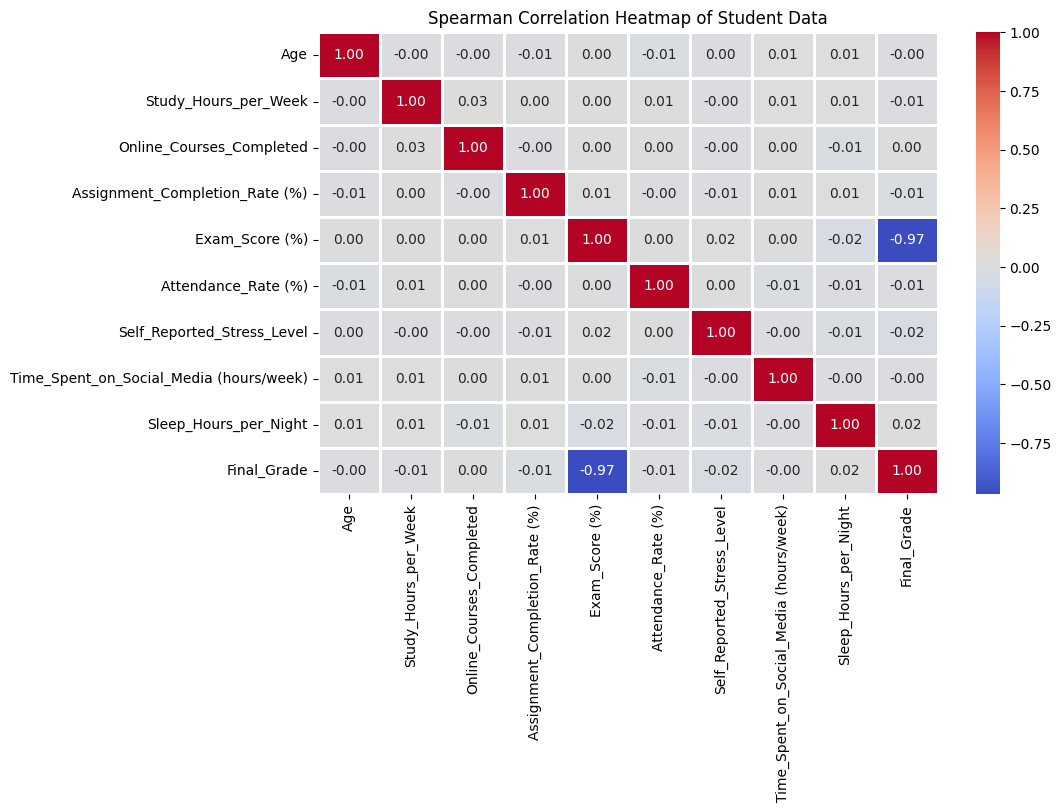

In [25]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Spearman Correlation Heatmap of Student Data")
plt.show()

In [26]:
Kendall_corr=numeric_df.corr(method='kendall')  # Use Kendall correlation

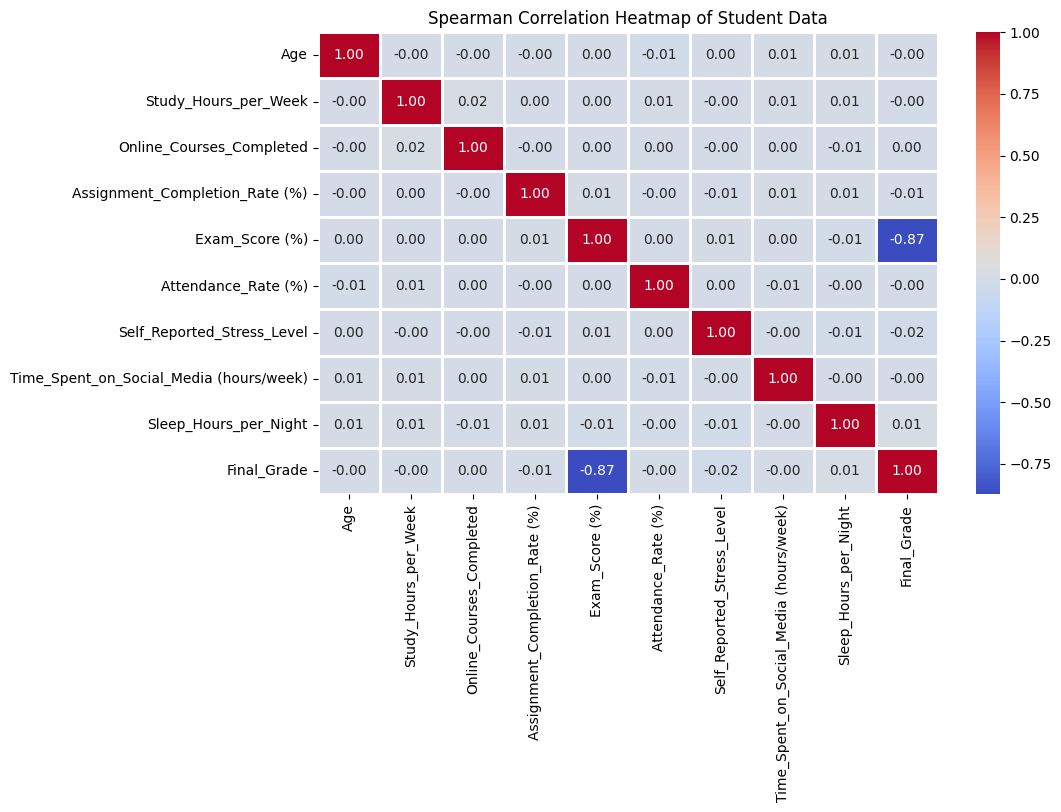

In [27]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Kendall_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Spearman Correlation Heatmap of Student Data")
plt.show()

### - after checking the correlation heatmap we can say that the data is not linearly related
### - Helps identify strong relationships
### - Most of the correlations are weak (close to 0) meaning the relationships between variables are not strong -So accuracy will be bad


## Data Visualization
- Histplot displays the distribution of numerical columns using histograms

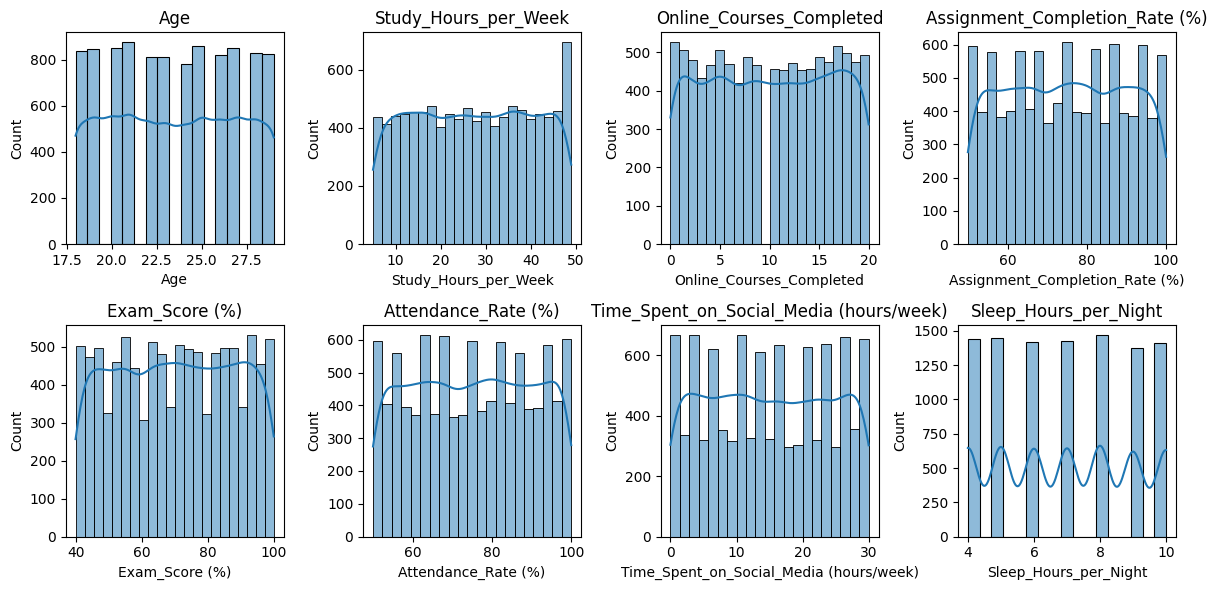

In [28]:
num_cols = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 
            'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data_clean[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

---


# Model Training
---
Steps for Building the Predictive Model

1️⃣ Select Features & Target Variable (Independent vs. Dependent)

2️⃣ Handle Categorical Data (Encoding)

3️⃣ Split Data into Training & Testing Sets

4️⃣ Train Machine Learning Models (Linear Regression, Decision Tree, Random Forest)

5️⃣ Evaluate Model Performance (Accuracy, RMSE, R² Score)

6️⃣ Optimize the Model (Hyperparameter tuning if needed)

---

In [32]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Initialize the logistic
X = data_clean.drop(columns=["Final_Grade"]) 
y = data_clean["Final_Grade"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

# Optional: Standardize the feature data (this step is recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the data
X_test_scaled = scaler.transform(X_test) # Transform the test data 

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs') # Adjust parameters as needed

# Train the model
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# 8. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print the accuracy of the model
print("Classification Report:\n", classification_report(y_test, y_pred))  # Detailed performance metrics


Accuracy: 0.9216
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       675
           1       0.92      0.83      0.87       628
           2       0.90      0.86      0.88       613
           3       0.93      1.00      0.96       584

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



/Users/junjie/MachineLearningProject/myVenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Define your features (X) and target (y)
X = data_clean.drop(columns=['Final_Grade'])  # Features
y = data_clean['Final_Grade']  # Target

# 2. Standardize your data (recommended for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# 3. Initialize your Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')

# 4. Perform cross-validation (5-fold cross-validation in this case)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')

# 5. Print the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores for each fold: [0.9375 0.941  0.936  0.9395 0.941 ]
Mean cross-validation accuracy: 0.9389999999999998
Standard deviation of cross-validation scores: 0.0019748417658131123


/Users/junjie/MachineLearningProject/myVenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/junjie/MachineLearningProject/myVenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/junjie/MachineLearningProject/myVenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/junjie/Machi

In [36]:
print(data_clean['Final_Grade'].value_counts())


Final_Grade
0    2678
1    2455
2    2440
3    2427
Name: count, dtype: int64
